In [1]:
import pandas as pd

df_reviews = pd.read_csv('IMDB Dataset.csv')

In [2]:
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [3]:
df_negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


<Axes: xlabel='sentiment'>

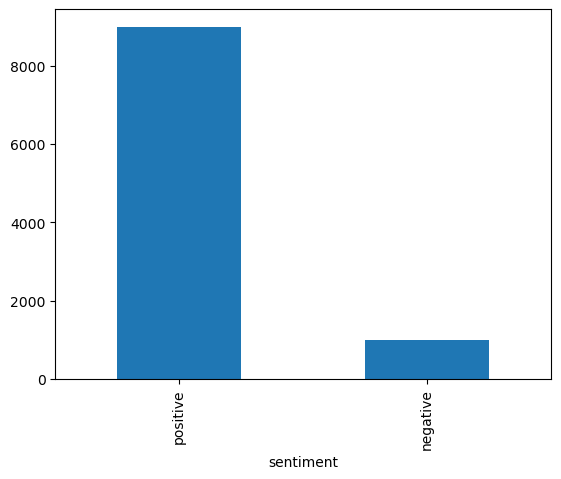

In [4]:
df_reviews_imb = pd.concat([df_positive, df_negative])
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

In [5]:
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])

df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']
df_reviews_bal= pd.concat([df_reviews_positive, df_reviews_negative])
df_reviews_bal.reset_index(drop=True,inplace=True)
df_reviews_bal.value_counts('sentiment')
df_reviews_bal

,review,sentiment
0,My wife is a mental health therapist and we wa...,positive
1,There is great detail in A Bug's Life. Everyth...,positive
2,"this movie is ok if you like mindless action ,...",positive
3,As an adult I really did enjoy this one. I wat...,positive
4,One of my favorite movies which has been overl...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']], df_reviews_imb['sentiment'])

print(df_reviews_imb.value_counts('sentiment'))
print(df_reviews_bal.value_counts('sentiment'))
df_reviews_bal

sentiment
positive    9000
negative    1000
Name: count, dtype: int64
sentiment
negative    1000
positive    1000
Name: count, dtype: int64


,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
10833,Knute Rockne led an extraordinary life and his...,positive
1039,At the height of the 'Celebrity Big Brother' r...,positive
5255,This is another of Robert Altman's underrated ...,positive
12237,This movie won a special award at Cannes for i...,positive
